In [1]:
# Day27 Assignment Batch1 AIML 
# Venkkatesh V R 
# Building Classificaion Model using KNN & SVM

In [63]:
# import the neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings
warnings.filterwarnings('ignore')


# KNN Model

##  Titanic dataset Classification Model

In [12]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data1 = pd.read_csv('test.csv')
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
# Encode
le = LabelEncoder()
data.Sex = le.fit_transform(data['Sex'])
data.Embarked = le.fit_transform(data['Embarked'])

In [20]:
feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
X = data[feature_cols]
X.drop(columns=['Age'],axis=1,inplace=True)
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [21]:
y = data[['Pclass']]

y

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
884,2
885,1
886,3
887,1


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=3,)

In [23]:
X_train.head()
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [24]:
y_train.head()

,Pclass
287,2
735,3
857,3
591,3
524,3


In [32]:
#Fit the model 
classifier = neighbors.KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print("The performance metric for the model with k=",1,"is:")
print("The model score is : ",score)
print("The accuracy score is:",accuracy_score(y_test,y_pred,normalize=True))
print("The confusion matrix is: \n",confusion_matrix(y_test,y_pred))


The performance metric for the model with k= 1 is:
The model score is :  0.9775280898876404
The accuracy score is: 0.9775280898876404
The confusion matrix is: 
 [[ 34   1   0]
 [  0  37   3]
 [  0   0 103]]




Model k = :  1
The performance metric for the model with k= 1 is:
The accuracy score is: 0.8707865168539326
The confusion matrix is: 
 [[40  6  1]
 [ 3 27  5]
 [ 1  7 88]]
Total records successfully predicted 155 out of 178 Records


Model k = :  2
The performance metric for the model with k= 2 is:
The accuracy score is: 0.8595505617977528
The confusion matrix is: 
 [[44  3  0]
 [ 5 28  2]
 [ 5 10 81]]
Total records successfully predicted 153 out of 178 Records


Model k = :  3
The performance metric for the model with k= 3 is:
The accuracy score is: 0.8764044943820225
The confusion matrix is: 
 [[41  6  0]
 [ 4 26  5]
 [ 5  2 89]]
Total records successfully predicted 156 out of 178 Records


Model k = :  4
The performance metric for the model with k= 4 is:
The accuracy score is: 0.8370786516853933
The confusion matrix is: 
 [[43  4  0]
 [ 6 25  4]
 [ 4 11 81]]
Total records successfully predicted 149 out of 178 Records


Model k = :  5
The performance metric for the model with k= 5 

The performance metric for the model with k= 38 is:
The accuracy score is: 0.7752808988764045
The confusion matrix is: 
 [[42  4  1]
 [ 5 16 14]
 [ 8  8 80]]
Total records successfully predicted 138 out of 178 Records


Model k = :  39
The performance metric for the model with k= 39 is:
The accuracy score is: 0.7752808988764045
The confusion matrix is: 
 [[42  4  1]
 [ 5 16 14]
 [ 8  8 80]]
Total records successfully predicted 138 out of 178 Records


Model k = :  40
The performance metric for the model with k= 40 is:
The accuracy score is: 0.7808988764044944
The confusion matrix is: 
 [[42  4  1]
 [ 5 16 14]
 [ 8  7 81]]
Total records successfully predicted 139 out of 178 Records


Model k = :  41
The performance metric for the model with k= 41 is:
The accuracy score is: 0.7808988764044944
The confusion matrix is: 
 [[42  4  1]
 [ 5 15 15]
 [ 8  6 82]]
Total records successfully predicted 139 out of 178 Records


Model k = :  42
The performance metric for the model with k= 42 is:
The 

The performance metric for the model with k= 75 is:
The accuracy score is: 0.7471910112359551
The confusion matrix is: 
 [[39  4  4]
 [ 4  8 23]
 [ 5  5 86]]
Total records successfully predicted 133 out of 178 Records


Model k = :  76
The performance metric for the model with k= 76 is:
The accuracy score is: 0.7471910112359551
The confusion matrix is: 
 [[39  4  4]
 [ 4  8 23]
 [ 5  5 86]]
Total records successfully predicted 133 out of 178 Records


Model k = :  77
The performance metric for the model with k= 77 is:
The accuracy score is: 0.7528089887640449
The confusion matrix is: 
 [[39  4  4]
 [ 4  8 23]
 [ 5  4 87]]
Total records successfully predicted 134 out of 178 Records


Model k = :  78
The performance metric for the model with k= 78 is:
The accuracy score is: 0.7471910112359551
The confusion matrix is: 
 [[38  5  4]
 [ 4  8 23]
 [ 5  4 87]]
Total records successfully predicted 133 out of 178 Records


Model k = :  79
The performance metric for the model with k= 79 is:
The 

The performance metric for the model with k= 111 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  4  9]
 [ 4  8 23]
 [ 5  3 88]]
Total records successfully predicted 130 out of 178 Records


Model k = :  112
The performance metric for the model with k= 112 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  4  9]
 [ 4  8 23]
 [ 5  3 88]]
Total records successfully predicted 130 out of 178 Records


Model k = :  113
The performance metric for the model with k= 113 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  4  9]
 [ 4  8 23]
 [ 5  3 88]]
Total records successfully predicted 130 out of 178 Records


Model k = :  114
The performance metric for the model with k= 114 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  4  9]
 [ 4  8 23]
 [ 5  3 88]]
Total records successfully predicted 130 out of 178 Records


Model k = :  115
The performance metric for the model with k= 115

The performance metric for the model with k= 148 is:
The accuracy score is: 0.7247191011235955
The confusion matrix is: 
 [[34 10  3]
 [ 4  7 24]
 [ 5  3 88]]
Total records successfully predicted 129 out of 178 Records


Model k = :  149
The performance metric for the model with k= 149 is:
The accuracy score is: 0.7191011235955056
The confusion matrix is: 
 [[34 10  3]
 [ 4  7 24]
 [ 5  4 87]]
Total records successfully predicted 128 out of 178 Records


Model k = :  150
The performance metric for the model with k= 150 is:
The accuracy score is: 0.7247191011235955
The confusion matrix is: 
 [[34 10  3]
 [ 4  7 24]
 [ 5  3 88]]
Total records successfully predicted 129 out of 178 Records


Model k = :  151
The performance metric for the model with k= 151 is:
The accuracy score is: 0.7247191011235955
The confusion matrix is: 
 [[34 10  3]
 [ 4  7 24]
 [ 5  3 88]]
Total records successfully predicted 129 out of 178 Records


Model k = :  152
The performance metric for the model with k= 152

The performance metric for the model with k= 185 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  5  8]
 [ 4  5 26]
 [ 5  0 91]]
Total records successfully predicted 130 out of 178 Records


Model k = :  186
The performance metric for the model with k= 186 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  5  8]
 [ 4  5 26]
 [ 5  0 91]]
Total records successfully predicted 130 out of 178 Records


Model k = :  187
The performance metric for the model with k= 187 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  5  8]
 [ 4  5 26]
 [ 5  0 91]]
Total records successfully predicted 130 out of 178 Records


Model k = :  188
The performance metric for the model with k= 188 is:
The accuracy score is: 0.7303370786516854
The confusion matrix is: 
 [[34  5  8]
 [ 4  5 26]
 [ 5  0 91]]
Total records successfully predicted 130 out of 178 Records


Model k = :  189
The performance metric for the model with k= 189

The performance metric for the model with k= 226 is:
The accuracy score is: 0.6853932584269663
The confusion matrix is: 
 [[30  5 12]
 [ 4  1 30]
 [ 5  0 91]]
Total records successfully predicted 122 out of 178 Records


Model k = :  227
The performance metric for the model with k= 227 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  3 14]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  228
The performance metric for the model with k= 228 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  3 14]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  229
The performance metric for the model with k= 229 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  3 14]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  230
The performance metric for the model with k= 230

The performance metric for the model with k= 261 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  0 17]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  262
The performance metric for the model with k= 262 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  0 17]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  263
The performance metric for the model with k= 263 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  0 17]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  264
The performance metric for the model with k= 264 is:
The accuracy score is: 0.6910112359550562
The confusion matrix is: 
 [[30  0 17]
 [ 3  2 30]
 [ 5  0 91]]
Total records successfully predicted 123 out of 178 Records


Model k = :  265
The performance metric for the model with k= 265

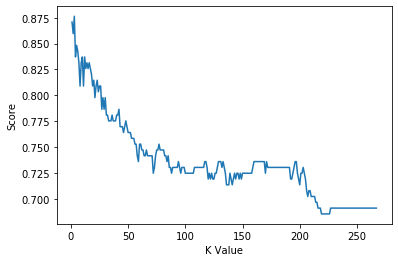

In [84]:
# To perform for other feature cols

def KNN_Model():
    feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
    model_cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked' ]
    # Train model
    k_score = []
    k_values = range(1,268)
    for i in k_values:
        print("\n\nModel k = : ",i)
        X = data[feature_cols]
        X.drop(columns=['Pclass'],axis=1,inplace=True)
        y = data[['Pclass']]
        X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0,)
        #Fit the model 
        classifier = neighbors.KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train,y_train)
        score = classifier.score(X_test, y_test)
        k_score.append(score)
        y_pred=classifier.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
        diagonal_sum = cm.trace()
        sum_of_all_elements = cm.sum()
        print("The performance metric for the model with k=",i,"is:")
        print("The accuracy score is:",accuracy_score(y_test,y_pred,normalize=True))
        print("The confusion matrix is: \n",cm)
        print(f"Total records successfully predicted {diagonal_sum} out of {sum_of_all_elements} Records")        
        
        
    print(f"\nMax Score is : {max(k_score)} and K value = {k_score.index(max(k_score)) + 1}")    
    plt.plot(k_values, k_score)
    plt.xlabel("K Value")
    plt.ylabel("Score");
    
              
KNN_Model()


# SVM

##  Titanic dataset Classification Model

In [50]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data1 = pd.read_csv('test.csv')
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [52]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [54]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [56]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [57]:
# Encode
le = LabelEncoder()
data.Sex = le.fit_transform(data['Sex'])
data.Embarked = le.fit_transform(data['Embarked'])

In [58]:
feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
X = data[feature_cols]
X.drop(columns=['Age'],axis=1,inplace=True)
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [59]:
y = data[['Pclass']]

y

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
884,2
885,1
886,3
887,1


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=0,)

In [66]:
X_train.head()
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [67]:
y_train.head()

,Pclass
350,1
124,3
577,3
422,3
118,3


In [68]:
#Fit the model 
classifier = svm.SVC(gamma=0.01,C=100)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print("The performance metric for the mode is:")
print("The model score is : ",score)
print("The accuracy score is:",accuracy_score(y_test,y_pred,normalize=True))
print("The confusion matrix is: \n",confusion_matrix(y_test,y_pred))


The performance metric for the mode is:
The model score is :  0.9925093632958801
The accuracy score is: 0.9925093632958801
The confusion matrix is: 
 [[ 70   0   0]
 [  2  47   0]
 [  0   0 148]]


In [82]:
# To perform for other feature cols

def svm_Model():
    feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
    model_cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked' ]
    
    # Train model
    model_score = []
    df_scores = pd.DataFrame(data=[], columns=['Feature', 'Score'])
    
    for j, i in enumerate(model_cols):
        print("\n\nFeature : ",i)
        X = data[feature_cols]
        X.drop(columns=[i],axis=1,inplace=True)
        y = data[[i]]
        X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=0,)
        #Fit the model 
        classifier = svm.SVC(gamma=0.01,C=100)
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
        score = classifier.score(X_test, y_test)
        df_scores.loc[j,'Feature'] = i
        df_scores.loc[j,'Score'] = score
        cm = confusion_matrix(y_test,y_pred)
        diagonal_sum = cm.trace()
        sum_of_all_elements = cm.sum()
        print("The accuracy score is:",accuracy_score(y_test,y_pred,normalize=True))
        print("The confusion matrix is: \n",cm)
        print(f"Total records successfully predicted {diagonal_sum} out of {sum_of_all_elements} Records")
    print("\n\nSummary \n",df_scores)
              
svm_Model()




Feature :  Survived
The accuracy score is: 0.7415730337078652
The confusion matrix is: 
 [[124  33]
 [ 36  74]]
Total records successfully predicted 198 out of 267 Records


Feature :  Pclass
The accuracy score is: 0.9026217228464419
The confusion matrix is: 
 [[ 64   4   2]
 [  4  36   9]
 [  1   6 141]]
Total records successfully predicted 241 out of 267 Records


Feature :  Sex
The accuracy score is: 0.7265917602996255
The confusion matrix is: 
 [[ 66  32]
 [ 41 128]]
Total records successfully predicted 194 out of 267 Records


Feature :  SibSp
The accuracy score is: 0.7490636704119851
The confusion matrix is: 
 [[150  24   7   0   1   0   0]
 [ 21  39   5   0   0   0   0]
 [  4   1   3   0   0   0   0]
 [  0   2   1   3   1   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]
Total records successfully predicted 200 out of 267 Records


Feature :  Parch
The accuracy score is: 0.797752808988764
The confusion matrix is: 
 [[187   6

In [ ]:
# End of Assignment